   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 640x480 3 persons, 1 bus, 441.5ms
Speed: 23.6ms preprocess, 441.5ms inference, 39.2ms postprocess per image at shape (1, 3, 640, 480)


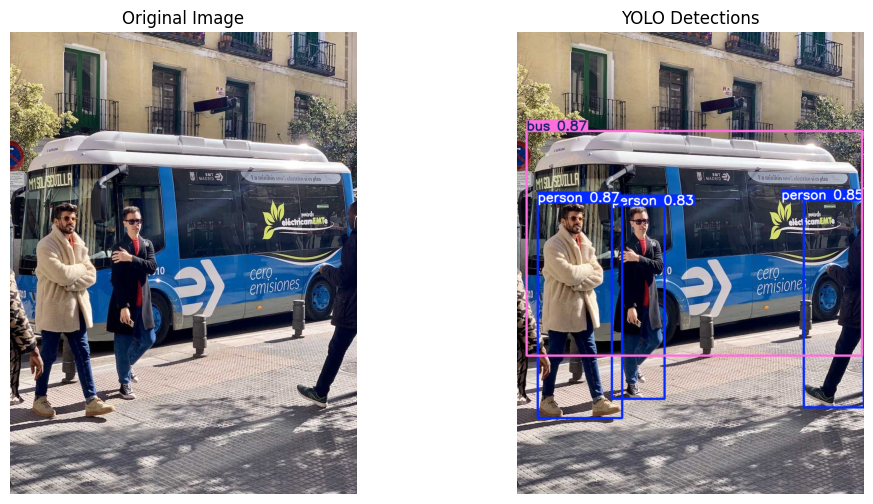

In [1]:
!pip install ultralytics opencv-python matplotlib

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# Load a YOLO model pre-trained on COCO
model = YOLO("yolov8n.pt")

# Load a test image from URL
image_url = "https://ultralytics.com/images/bus.jpg"
resp = urllib.request.urlopen(image_url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Perform prediction
results = model.predict(source=image, conf=0.5, iou=0.5)

# Get image with detections
res_plotted = results[0].plot()

# Display original image and detections
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Image with detections
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.title("YOLO Detections")
plt.axis("off")

plt.show()
